In [65]:
# data analysis library to read and explore the data
import pandas as pd

In [3]:
# teams.csv contains the data used
teams = pd.read_csv("teams.csv")

In [4]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [5]:
# drop the columns that are not needed
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [6]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [7]:
# get the correlation between the medals column and the other columns in the data
# strong correlations and required for the machine learning model
teams.corr()["medals"]

C:\Users\cynth\AppData\Local\Temp/ipykernel_17076/3553819720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [8]:
# python graphic library to plot the data
import seaborn as sns

In [1]:
# strong correlation and linear relationship is there
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True, ci=None) 

NameError: name 'sns' is not defined

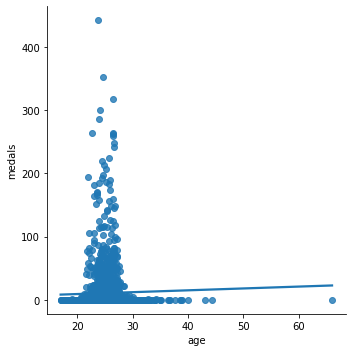

In [10]:
# weak correlation, no proper linear correlation
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True, ci=None)

<AxesSubplot:ylabel='Frequency'>

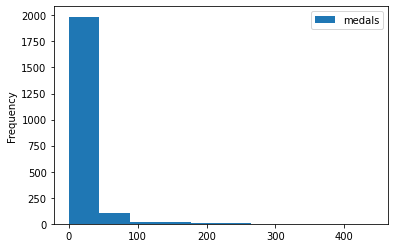

In [11]:
# histogram to see how the medals are earned by how many teams
teams.plot.hist(y="medals")

In [12]:
# find missing values
teams[teams.isnull().any(axis=1)].head(20)

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
82,ARM,Armenia,1996,38,24.0,NaN,2
88,ARU,Aruba,1988,12,27.8,NaN,0
96,ASA,American Samoa,1988,6,27.0,NaN,0
131,AZE,Azerbaijan,1996,24,25.1,NaN,1
150,BAN,Bangladesh,1984,2,21.0,NaN,0


In [13]:
# drop missing value rows
teams = teams.dropna()

In [14]:
teams.shape

(2014, 7)

In [15]:
# split data into train data set and test data set
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [16]:
# About 80% of the data
train.shape

(1609, 7)

In [17]:
# About 20% of the data
test.shape

(405, 7)

In [19]:
# train the model and make prediction with a linear model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [24]:
# columns used to make predictions / train the algorithm
predictors = ["athletes", "prev_medals"]
# colum to be predicted
target = "medals"

In [25]:
# fit the linear regression model
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [28]:
# Making predictions using test data
predictions = reg.predict(test[predictors])

In [34]:
# putting the predictions in the table
test["predictions"] = predictions

In [35]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [38]:
# rounding off to whole numbers
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [39]:
# calculate the mean absolute error which gives the average error from 
# the actual number of medals won by the team in olympics
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.2987654320987656

In [41]:
# check if the error is acceptable i.e. it should be lower than 
# standard deviation std
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [42]:
# checking different predictions team by team
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [43]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [48]:
# checking the absolute error for for each country
# difference between no. of predicted medals and actual medals
errors = (test["medals"] - test["predictions"]).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [51]:
# now grouping the errors by team and calculating the mean error
# gives the difference between preicted and actual medals for each team
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [53]:
# how many medals each team/country won on average
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [56]:
# ratio between the errors
error_ratio =  error_by_team / medals_by_team 
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [61]:
# remove NaN and inf missing values
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

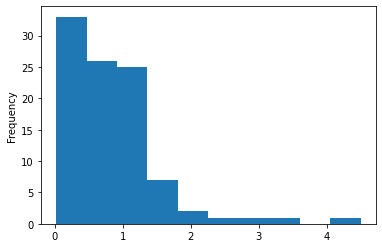

In [63]:
error_ratio.plot.hist()

In [64]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64